In [3]:
pip install biobert-embedding==0.1.2 torch==1.2.0 -f https://download.pytorch.org/whl/torch_stable.html 

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 663.1MB 25kB/s 
     |████████████████████████████████| 133kB 7.3MB/s 
     |████████████████████████████████| 133kB 34.5MB/s 
     |████████████████████████████████| 7.7MB 35.5MB/s 
     |████████████████████████████████| 81kB 10.1MB/s 
  Created wheel for biobert-embedding: filename=biobert_embedding-0.1.2-cp37-none-any.whl size=5701 sha256=752a02e54fa812fb1aadea132fcce41f16814aba0ea434251144533a0e5ffece
  Stored in directory: /root/.cache/pip/wheels/ad/15/65/3fc6192a7cb7920672bb46d566173decb0875f35bbe03cd09d
Successfully built biobert-embedding
ERROR: torchvision 0.10.0+cu102 has requirement torch==1.9.0, but you'll have torch 1.2.0+cu92 which is incompatible.
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 1.2.0+cu92 which is incompatible.
ERROR: botocore 1.20.101 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incom

In [4]:
from biobert_embedding.embedding import BiobertEmbedding 

In [5]:
biobert = BiobertEmbedding()

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

In [6]:
import numpy as np
import pandas as pd 

In [7]:
doc_vectors=pd.read_csv('/content/preprocessed_ade.csv')

In [8]:
doc_vectors

,Unnamed: 0,observation,labels
0,12606,early phase ii semi double blind study of the ...,0
1,685,cessation of mtx therapy led to complete regre...,0
2,5127,cutaneous biopsy showed hyphae and round inclu...,0
3,3158,she was treated with acyclovir and subsequentl...,1
4,10685,cisplatin was substituted and the patient achi...,0
...,...,...,...
23511,982,ticlopidine induced aplastic anemia two new c...,1
23512,14487,the risks of sumatriptan administration in pat...,0
23513,4680,however the spectrum of hosts and clinical p...,0
23514,2588,antibiotic treatment should be continued,0


In [9]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences 

In [10]:
#doc_vectors = pd.read_csv('/content/biobert_embeddings.csv') 

In [11]:
doc_vectors.drop(columns='Unnamed: 0' , inplace= True)

In [12]:
req_lines = list()
lines = doc_vectors["observation"].values.tolist()

In [13]:
lines[0]

'early phase ii semi double blind study of the new alkaline propanolamine derivative enciprazine   short communication'

In [14]:
import nltk 
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
from nltk import word_tokenize 
from nltk.corpus import stopwords


In [16]:
import string

In [17]:
#stopwords = set(nltk.corpus.stopwords.words('english'))

In [18]:
"""
def CleanTokenize(doc_vectors):
    req_lines = list()
    lines = doc_vectors["observation"].values.tolist()

    for line in lines:
        #line = clean_text(line)
        # tokenize the text
        #tokens=biobert.tokens(line)
        tokens = word_tokenize(line)
        tokens = [w.lower() for w in tokens]
        # remove puntuations
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        # remove non alphabetic characters
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        # remove stop words
        stop_words.discard('not')
        words = [w for w in words if not w in stop_words]
        req_lines.append(words)    
    return req_lines

req_lines = CleanTokenize(doc_vectors)
req_lines[0]
"""

'\ndef CleanTokenize(doc_vectors):\n    req_lines = list()\n    lines = doc_vectors["observation"].values.tolist()\n\n    for line in lines:\n        #line = clean_text(line)\n        # tokenize the text\n        #tokens=biobert.tokens(line)\n        tokens = word_tokenize(line)\n        tokens = [w.lower() for w in tokens]\n        # remove puntuations\n        table = str.maketrans(\'\', \'\', string.punctuation)\n        stripped = [w.translate(table) for w in tokens]\n        # remove non alphabetic characters\n        words = [word for word in stripped if word.isalpha()]\n        stop_words = set(stopwords.words("english"))\n        # remove stop words\n        stop_words.discard(\'not\')\n        words = [w for w in words if not w in stop_words]\n        req_lines.append(words)    \n    return req_lines\n\nreq_lines = CleanTokenize(doc_vectors)\nreq_lines[0]\n'

In [19]:
max_feature_length = 768
tokenizer = Tokenizer(num_words=max_feature_length, split=' ')
tokenizer.fit_on_texts(doc_vectors['observation'].values)
x = tokenizer.texts_to_sequences(doc_vectors['observation'].values)
x = pad_sequences(x,maxlen=max_feature_length)
word_index = tokenizer.word_index 

In [20]:
len(word_index)

16445

In [21]:
y = doc_vectors['labels'].values

In [22]:
print(x.shape)
print(y.shape)

(23516, 768)
(23516,)


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2021)

In [25]:
embedding_dim = 768
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    #if word in word2vec_model: 
        embedding_vector = biobert.sentence_vector(word)
        embedding_matrix[i] = embedding_vector 

In [26]:
from keras.layers import Embedding

In [27]:
embedding_layer = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[embedding_matrix],
                            trainable=False) 

In [28]:
import tensorflow as tf 

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, LSTM
from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from keras.callbacks import ModelCheckpoint
from keras.models import load_model 

In [30]:
print(x_train.shape , y_train.shape)
print(x_test.shape, y_test.shape)

(18812, 768) (18812,)
(4704, 768) (4704,)


In [31]:
model_biobert = Sequential()
model_biobert.add(embedding_layer) 
model_biobert.add(LSTM(192))

model_biobert.add(Dense(1, activation='sigmoid'))


model_biobert.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
history=model_biobert.fit(x_train,y_train, batch_size=500, epochs=10, validation_data=(x_test, y_test),shuffle=True) 


Epoch 1/10
38/38 [==============================] - 1107s 28s/step - loss: 0.6595 - accuracy: 0.6889 - val_loss: 0.5731 - val_accuracy: 0.7192
Epoch 2/10
38/38 [==============================] - 1111s 29s/step - loss: 0.5584 - accuracy: 0.7246 - val_loss: 0.5026 - val_accuracy: 0.7519
Epoch 3/10
38/38 [==============================] - 1079s 28s/step - loss: 0.4945 - accuracy: 0.7590 - val_loss: 0.4563 - val_accuracy: 0.7832
Epoch 4/10
38/38 [==============================] - 1110s 29s/step - loss: 0.4582 - accuracy: 0.7841 - val_loss: 0.4437 - val_accuracy: 0.7957
Epoch 5/10
38/38 [==============================] - 1067s 28s/step - loss: 0.4419 - accuracy: 0.7908 - val_loss: 0.4258 - val_accuracy: 0.8048
Epoch 6/10
38/38 [==============================] - 1056s 28s/step - loss: 0.4257 - accuracy: 0.8064 - val_loss: 0.4089 - val_accuracy: 0.8138
Epoch 7/10
38/38 [==============================] - 1056s 28s/step - loss: 0.4055 - accuracy: 0.8153 - val_loss: 0.4031 - val_accuracy: 0.8142

In [33]:
import matplotlib.pyplot as plt 

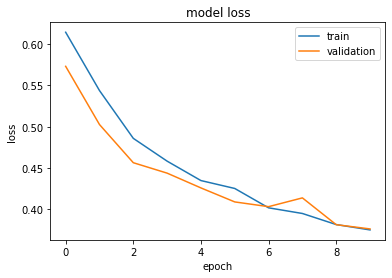

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show() 

In [35]:
y_pred = model_biobert.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [36]:
from sklearn.metrics import confusion_matrix,classification_report

In [37]:
print(confusion_matrix(y_test,y_pred))

[[3133  227]
 [ 568  776]]


In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      3360
           1       0.77      0.58      0.66      1344

    accuracy                           0.83      4704
   macro avg       0.81      0.75      0.77      4704
weighted avg       0.83      0.83      0.82      4704

